<a href="https://colab.research.google.com/github/joshuashelton2003/CRM-APPLICATION-FOR-SCHOOLS-OR-COLLEGE/blob/main/YOUTUBE%20REVENUE%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

youtube

In [ ]:
import pandas as pd
import os
csv_names = ['Table data 2018.csv', 'Table data 2019.csv', 'Table data 2020.csv']
path = ["/content/Table data 2018.csv","/content/Table data 2019.csv","/content/Table data 2020.csv"]

In [ ]:
df = pd.concat((pd.read_csv(os.path.join(path[0]))[1:-1],
                pd.read_csv(os.path.join(path[1]))[1:-1],
               pd.read_csv(os.path.join(path[2]))[1:-1])).reset_index(drop=True)

df.columns = df.columns.str.replace(' ', '_')
col_map ={'Av­er­age_views_per_view­er':'Average_views_per_viewer',
          'Unique_view­ers':'Unique_viewers',
          'Av­er­age_per­cent­age_viewed_(%)':'Average_viewed',
          'Im­pres­sions':'Impressions',
          'Dis\xadlikes':'Dislikes',
          'Sub­scribers_lost':'Subscribers_lost',
          'Sub­scribers_gained':'Subscribers_gained',
          'Videos_pub­lished':'Videos_added',
          'Videos_ad­ded':'Videos_published',
          'Sub­scribers':'Subscribers',
          'Im­pres­sions_click-through_rate_(%)':'Click_rate',
          'Com­ments_ad­ded':'Comments',
          'Watch_time_(hours)':'Watch_hours',
          'Av­er­age_view_dur­a­tion':'Average_view_sec',
          'Your_es­tim­ated_rev­en­ue_(USD)':'Revenue'}
df = df.rename(columns=col_map)
df = df.drop(['Likes_(vs._dis­likes)_(%)',
              'Videos_added',
              'Subscribers_lost',
              'Subscribers_gained'], axis=1)

print("2018-2020 YouTuber 'PoohinKorea' Daily Data")
print("="*45)
print('Data Size: ', df.shape)
print('Null Values: ', df.isna().sum().sum())
print('Data types: ', df.dtypes.reset_index().groupby(0).count().reset_index().values.tolist())
df.head(2)

2018-2020 YouTuber 'PoohinKorea' Daily Data
Data Size:  (1132, 16)
Null Values:  141
Data types:  [[dtype('float64'), 14], [dtype('O'), 2]]


,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,NaN,4.0,37.0,0.9575,0:01:33,0.0


In [ ]:
df.select_dtypes(include=('object')).head(2)

,Date,Average_view_sec
0,2018-08-21,0:01:51
1,2018-08-22,0:01:33


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds

In [ ]:
df.isna().sum().reset_index().style.highlight_min()

,index,0
0,Date,0
1,Average_views_per_viewer,0
2,Unique_viewers,0
3,Click_rate,0
4,Impressions,0
5,Comments,0
6,Shares,0
7,Dislikes,0
8,Likes,0
9,Average_viewed,0


In [ ]:
df.Videos_published.value_counts(dropna=False)

,count
Videos_published,
0.0,854
NaN,141
1.0,113
2.0,17
3.0,4
4.0,3


In [ ]:
df.Videos_published = df.Videos_published.fillna(0.0, axis=0)
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Date', 'Average_views_per_viewer', 'Unique_viewers', 'Click_rate',
       'Impressions', 'Comments', 'Shares', 'Dislikes', 'Likes',
       'Average_viewed', 'Videos_published', 'Subscribers', 'Views',
       'Watch_hours', 'Average_view_sec', 'Revenue'],
      dtype='object')

In [ ]:
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0


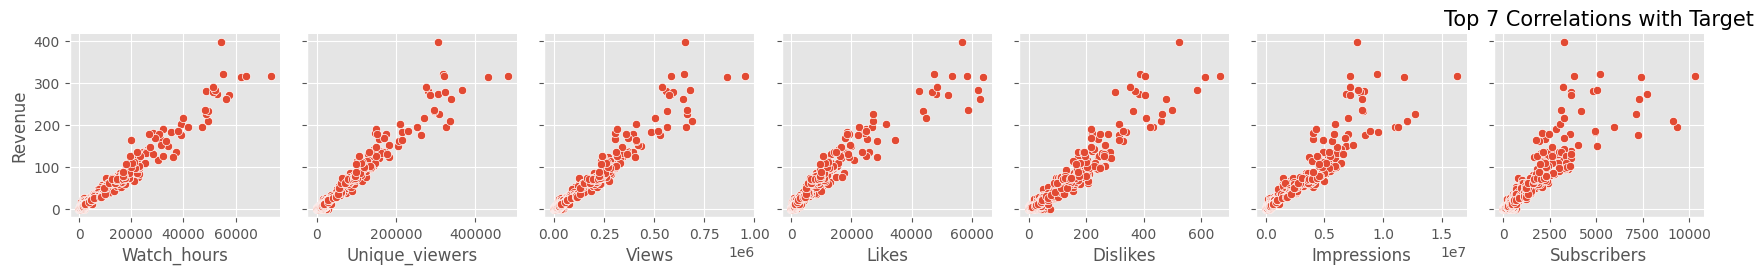

In [ ]:
top_corr_name = df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][:8].values
sns.pairplot(df[top_corr_name], x_vars=top_corr_name[1:], y_vars=top_corr_name[0])
plt.title('Top 7 Correlations with Target', fontsize=15)
plt.show()

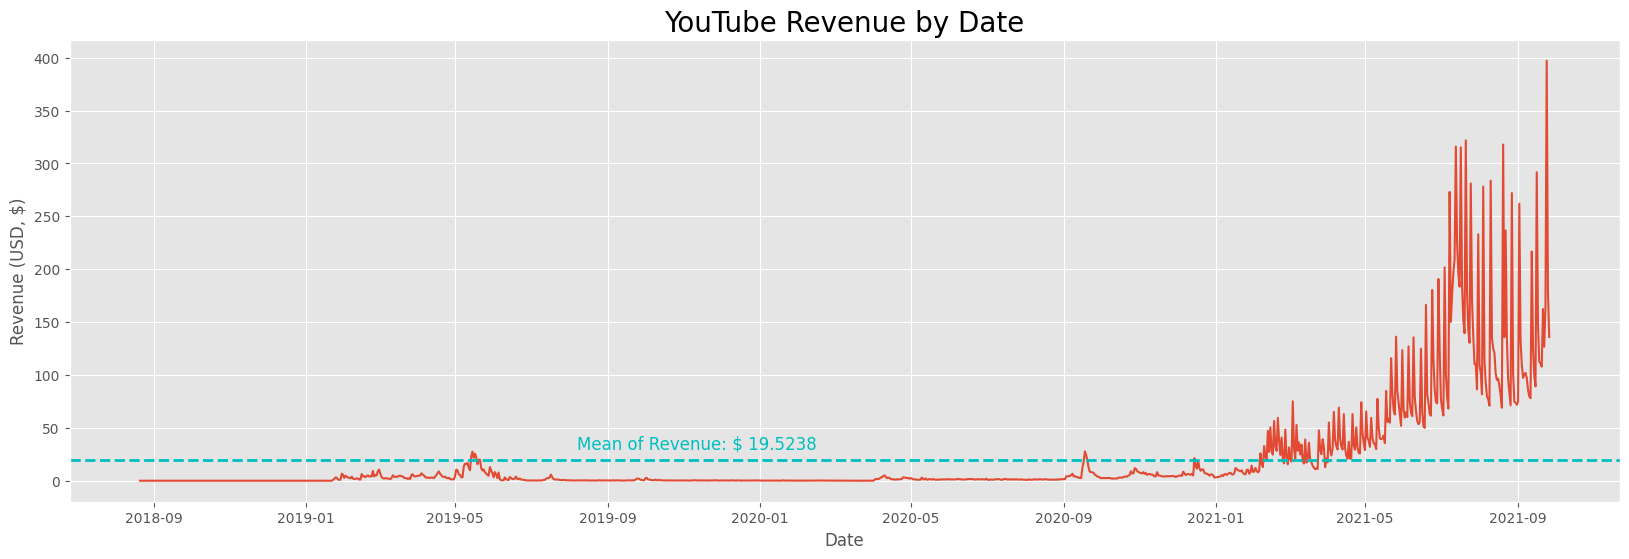

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Date', y='Revenue')
plt.axhline(df.Revenue.mean(), color='c', linestyle='--', linewidth=2)
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)),
             (df.Date[350], 30),
             fontsize=12,
             color='c')
plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.show()

In [ ]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()[1:].style.bar(align='mid')

,index,Revenue
1,Watch_hours,0.984514
2,Unique_viewers,0.978712
3,Views,0.976545
4,Likes,0.964728
5,Dislikes,0.963711
6,Impressions,0.941682
7,Subscribers,0.907303
8,Comments,0.830628
9,Shares,0.812967
10,Average_view_sec,0.646830


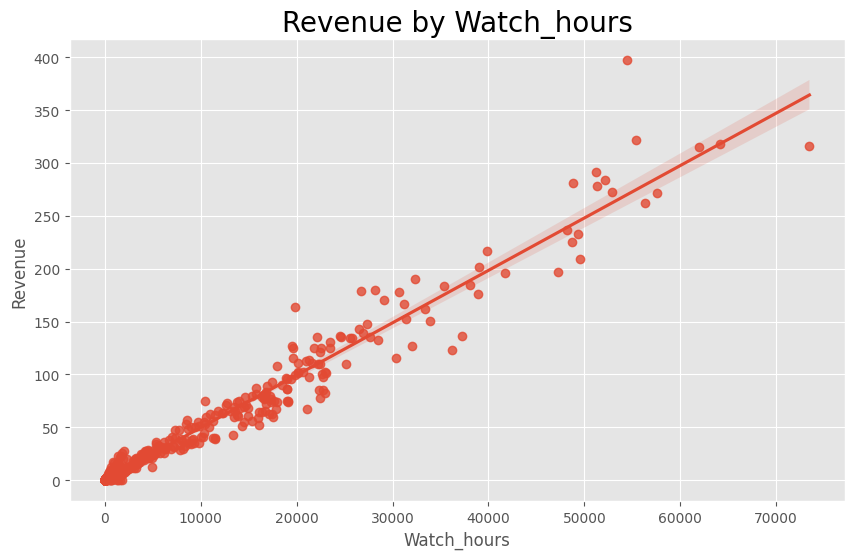

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Watch_hours', y='Revenue')
plt.title('Revenue by Watch_hours', fontsize=20)
plt.show()

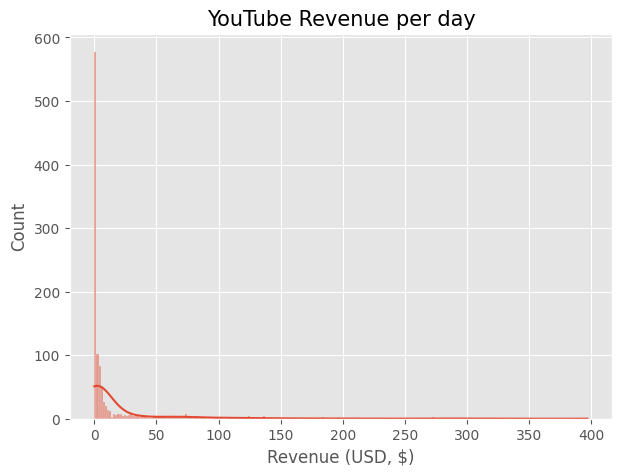

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

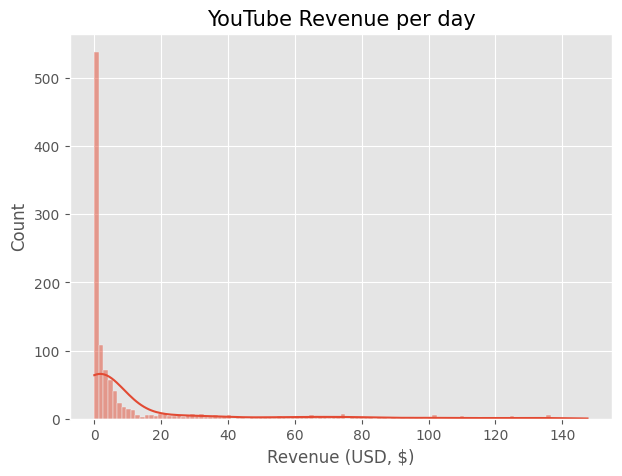

In [ ]:
df = df[(df['Revenue'] <= 150)].reset_index(drop=True)
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

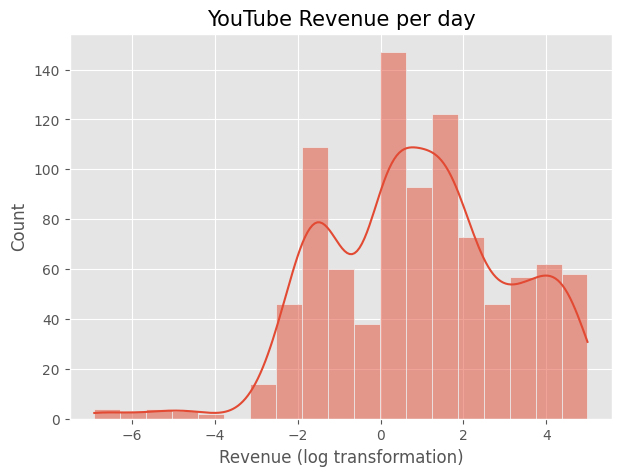

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(np.log(df['Revenue']), kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (log transformation)')
plt.show()

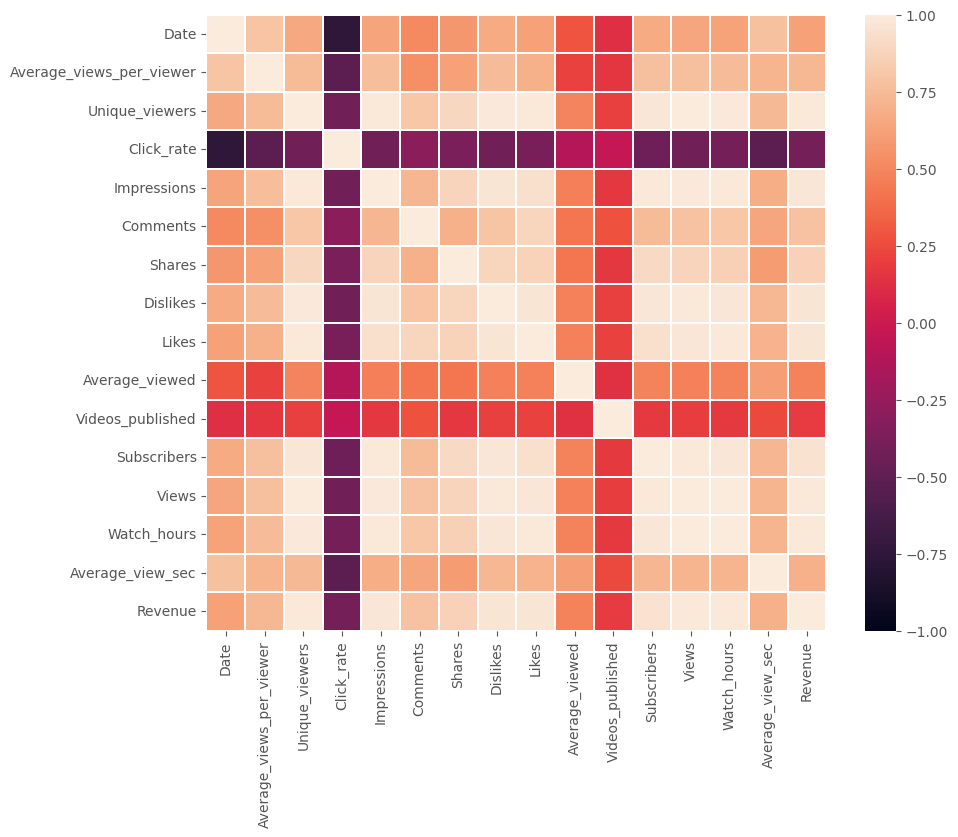

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidths=.2)
plt.show()

In [ ]:
df.describe().loc[['mean', 'std', 'min', '50%', 'max']]

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
mean,2020-02-23 01:40:53.503184640,1.614731,18141.957234,6.616151,6.165458e+05,133.624204,87.180164,29.328480,1760.494995,28.441228,0.138308,380.376706,37299.474067,2710.063589,179.736124,13.229895
std,NaN,0.321479,33306.404588,2.259077,1.345969e+06,302.549886,192.646676,54.560777,3747.027020,5.768121,0.429955,683.353242,74876.404616,5858.248179,56.878049,27.814934
min,2018-08-21 00:00:00,1.000000,8.000000,3.520000,4.400000e+01,0.000000,0.000000,-1.000000,-1.000000,10.950000,0.000000,-8.000000,8.000000,0.115200,51.000000,0.000000
50%,2020-02-22 00:00:00,1.545200,3652.000000,6.140000,6.588600e+04,26.000000,20.000000,5.000000,244.000000,27.800000,0.000000,111.000000,5792.000000,273.117200,174.000000,1.438000
max,2021-09-26 00:00:00,2.615800,182161.000000,23.140000,6.615916e+06,3642.000000,2233.000000,284.000000,28326.000000,62.190000,4.000000,3665.000000,403655.000000,37234.927900,367.000000,147.525000


In [ ]:
df.to_csv("/content/2018-2019 Data.csv")

In [ ]:
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0


In [ ]:
Subs = df.Subscribers.values.tolist()
Subs_accumulated = []
count = 0
for s in Subs:
    count += s
    Subs_accumulated.append(count)


In [ ]:
df['Subs_accumulated'] = Subs_accumulated
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0,5.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0,9.0


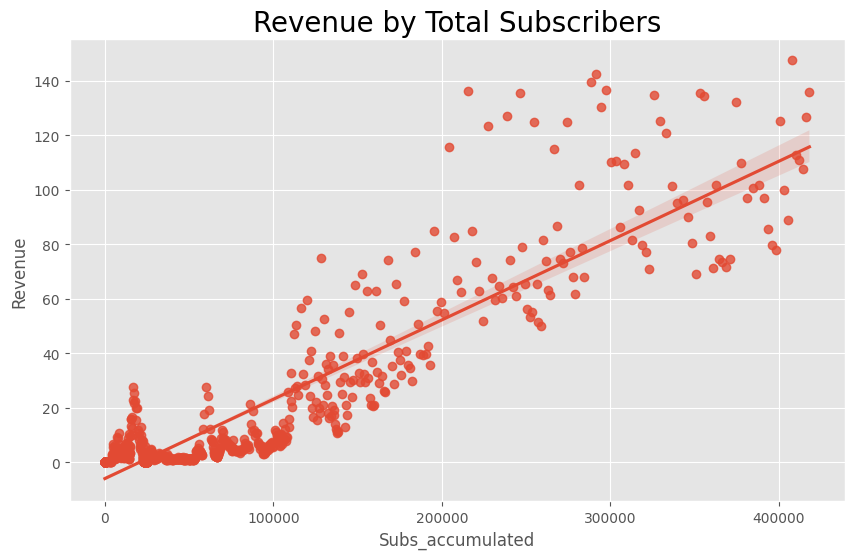

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Subs_accumulated', y='Revenue')
plt.title('Revenue by Total Subscribers', fontsize=20)
plt.show()

In [ ]:
Video_pub = df.Videos_published.values.tolist()
Videos = []
count = 0
for v in Video_pub:
    count += v
    Videos.append(count)

In [ ]:
df['Videos'] = Videos
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0,5.0,1.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0,9.0,1.0


In [ ]:
df.Videos_published.value_counts()

,count
Videos_published,
0.0,974
1.0,105
2.0,15
3.0,3
4.0,2


In [ ]:
df['Videos_published'] = df.Videos_published.mask((df.Videos_published>0), 1).astype('int')

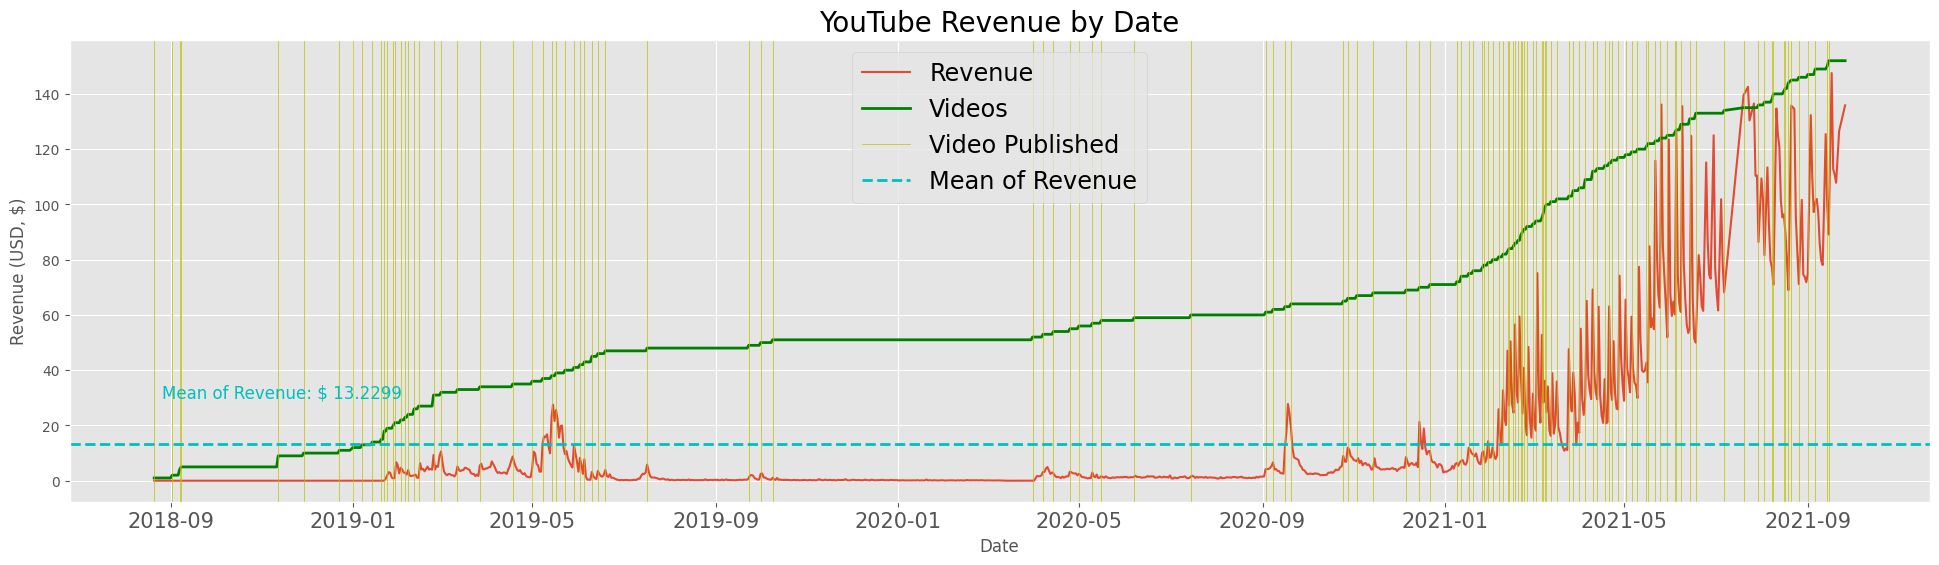

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(24, 6))

x = sns.lineplot(data=df, x='Date', y='Revenue', label='Revenue', lw=1.5)
ax = sns.lineplot(data=df, x='Date', y='Videos', label='Videos', color='g', lw=2, linestyle='-')
plt.axvline(df.Date[0], color='y', label='Video Published', lw=0.5)

for i in range(1, len(df)):
    if df.Videos_published[i] == 1:
        plt.axvline(df.Date[i], color='y', lw=0.5)

plt.axhline(df.Revenue.mean(), color='c', linestyle='--', linewidth=2, label='Mean of Revenue')
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)),
             (df.Date[5], 30),
             fontsize=12,
             color='c')

plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.xticks(fontsize=15)
ax.legend(fontsize='xx-large')
plt.show()

In [ ]:
df = df[(df['Date'] > '20200901')].reset_index(drop=True)
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2020-09-02,1.7296,3565.0,5.69,82419.0,40.0,32.0,3.0,344.0,23.68,0,195.0,6166.0,305.4844,178,1.532,53582.0,60.0
1,2020-09-03,1.6349,9602.0,6.96,162769.0,183.0,40.0,11.0,1602.0,30.79,1,268.0,15698.0,910.9613,208,4.096,53850.0,61.0
2,2020-09-04,1.6092,9930.0,6.89,182250.0,78.0,55.0,13.0,997.0,28.86,0,277.0,15979.0,854.6027,192,4.233,54127.0,61.0
3,2020-09-05,1.6086,12425.0,6.86,231165.0,56.0,62.0,29.0,1115.0,28.39,0,342.0,19987.0,1038.3357,187,4.248,54469.0,61.0
4,2020-09-06,1.5435,14690.0,6.96,264697.0,69.0,62.0,27.0,1322.0,28.87,0,453.0,22674.0,1177.9374,187,4.607,54922.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-09-18,2.3484,113363.0,3.90,4995859.0,540.0,539.0,197.0,12117.0,38.75,0,2173.0,266218.0,20999.7588,283,112.856,409854.0,152.0
353,2021-09-19,2.3207,112822.0,3.72,5140093.0,558.0,441.0,178.0,11353.0,37.68,0,2222.0,261821.0,20159.2703,277,110.829,412076.0,152.0
354,2021-09-20,2.3670,98239.0,3.78,4509271.0,425.0,453.0,163.0,9536.0,37.28,0,1997.0,232530.0,17900.4225,277,107.846,414073.0,152.0
355,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,195.0,10594.0,25.75,0,1809.0,240554.0,19512.3516,292,126.600,415882.0,152.0


In [ ]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [ ]:
cell_hover = {  # for row hover use  instead of
    'selector': 'td:hover',
    'props': [('background-color', 'green')]
}



In [ ]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index().style.set_table_styles([cell_hover])

,index,Revenue
0,Revenue,1.000000
1,Unique_viewers,0.977431
2,Views,0.975850
3,Watch_hours,0.972490
4,Impressions,0.962151
5,Dislikes,0.948283
6,Likes,0.944926
7,Subscribers,0.933396
8,Subs_accumulated,0.896805
9,Videos,0.882060


In [ ]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][1:14].values

array(['Unique_viewers', 'Views', 'Watch_hours', 'Impressions',
       'Dislikes', 'Likes', 'Subscribers', 'Subs_accumulated', 'Videos',
       'Date', 'Shares', 'Average_views_per_viewer', 'Average_view_sec'],
      dtype=object)

In [ ]:
features_chosen=[
                #  'Watch_hours',
                #  'Unique_viewers',
                #  'Views',
                #  'Likes',
                #  'Dislikes',
                #  'Impressions',
                 'Subs_accumulated',
                #  'Subscribers',
                 'Comments',
                 'Shares',
                #  'Videos',
                 'Average_view_sec',
                #  'Average_views_per_viewer',
                 'Average_viewed'
                 ]
calculate_vif(df.iloc[:,1:], features=features_chosen).style.apply(lambda x: ['background:green' if v < 0.2 else '' for v in x], axis=1)

,VIF,Tolerance
Subs_accumulated,3.218636,0.310691
Comments,2.400777,0.416532
Shares,3.177016,0.314761
Average_view_sec,3.074383,0.325269
Average_viewed,1.783906,0.560568


In [ ]:
# cols_remove = [
#                'Average_views_per_viewer',
#                 'Watch_hours',
#                 'Unique_viewers',
#                 'Views',
#                 'Likes',
#                 'Dislikes',
#                 'Impressions',
#                 'Subs_accumulated',
#                 'Date']

cols_remove = [
                    'Date',
                # 'Watch_hours',
                #  'Unique_viewers',
                #  'Views',
                 'Dislikes',
                #  'Impressions',
                 'Subscribers',
                 'Comments',
                 'Shares',
                 'Videos',
                 'Average_view_sec',
                 'Average_views_per_viewer',
                 'Average_viewed',
                 'Videos_published',
                 'Click_rate',
            #    'Subs_accumulated',
                 ]


df_new = df.copy()
df_new = df_new.drop(cols_remove, axis=1)
print('New Data Shape: ', df_new.shape)
df_new.head(2)





















New Data Shape:  (357, 7)


,Unique_viewers,Impressions,Likes,Views,Watch_hours,Revenue,Subs_accumulated
0,3565.0,82419.0,344.0,6166.0,305.4844,1.532,53582.0
1,9602.0,162769.0,1602.0,15698.0,910.9613,4.096,53850.0


In [ ]:
df_new.corr()['Revenue']

,Revenue
Unique_viewers,0.977431
Impressions,0.962151
Likes,0.944926
Views,0.975850
Watch_hours,0.972490
Revenue,1.000000
Subs_accumulated,0.896805


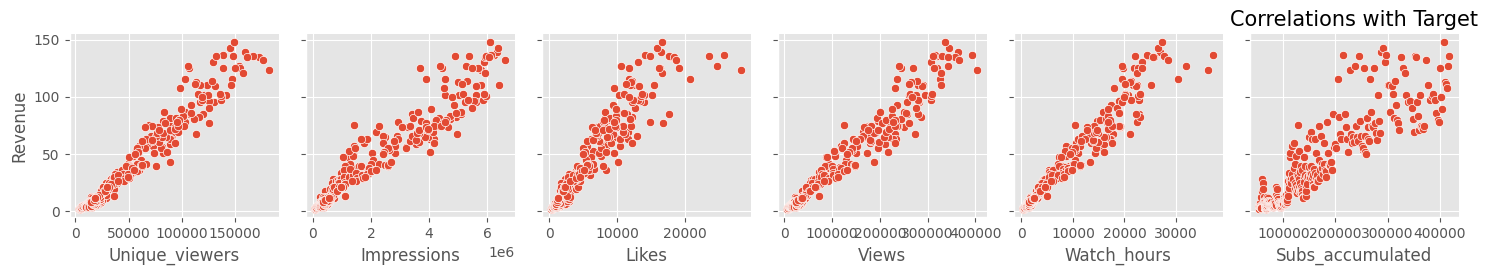

In [ ]:
sns.pairplot(df_new, x_vars=df_new.columns.drop('Revenue'), y_vars=['Revenue'])
plt.title('Correlations with Target', fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = df_new[:int(len(df_new)*0.8)]
test = df_new[int(len(df_new)*0.8):]
train.shape, test.shape

((285, 7), (72, 7))

In [ ]:
target = 'Revenue'

X_train = train.drop(target, axis=1)
y_train = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

X_train.shape, y_train.shape

((285, 6), (285,))

In [ ]:
from sklearn.feature_selection import f_regression

pvalue_table = pd.DataFrame(f_regression(X_train, y_train), columns=X_train.columns).T.rename(columns={0:'F_statistic', 1:'p_values'})
pvalue_table.style.apply(lambda x: ["background: green" if v < 0.05 else "" for v in x], axis = 1)

,F_statistic,p_values
Unique_viewers,6222.843772,0.000000
Impressions,1876.512061,0.000000
Likes,3073.756391,0.000000
Views,4103.723499,0.000000
Watch_hours,4466.619683,0.000000
Subs_accumulated,662.696705,0.000000


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluate(title, y, y_):
    mae = mean_absolute_error(y, y_)
    rmse = mean_squared_error(y, y_)**0.5
    r2 = r2_score(y, y_)
    print('*{} Result*'.format(title))
    print('='*50)
    print('MAE Score: $', mae)
    print('RMSE Score: $', rmse)
    print('R2 Score: ', r2)
    print()

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lin = make_pipeline(
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

pipe_lin.fit(X_train, y_train)
y_pred = np.exp(pipe_lin.predict(X_test))
evaluate('Linear Regression', y_test, y_pred)

*Linear Regression Result*
MAE Score: $ 2.4216567788171015e+58
RMSE Score: $ 1.9909852746570334e+59
R2 Score:  -6.416492784980831e+115



In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
tt_lin = TransformedTargetRegressor(regressor=pipe_lin,
                                func=np.log1p, inverse_func=np.expm1)

tt_lin.fit(X_train, y_train)
y_pred = tt_lin.predict(X_test)
evaluate('Log Transformed Linear Regression', y_test, y_pred)

*Log Transformed Linear Regression Result*
MAE Score: $ 717.9467755058954
RMSE Score: $ 1319.0606403387058
R2 Score:  -2815.3792592742266



In [ ]:
pipe_ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.arange(100, 105, 0.01), cv=5)
)

tt_ridge = TransformedTargetRegressor(regressor=pipe_ridge,
                                func=np.log1p, inverse_func=np.expm1)

tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)
print('Best alpha: ', tt_ridge.regressor_.named_steps['ridgecv'].alpha_)
evaluate('Log Transformed Ridge', y_test, y_pred)

Best alpha:  104.99000000000255
*Log Transformed Ridge Result*
MAE Score: $ 132.31072549981667
RMSE Score: $ 177.49102113626387
R2 Score:  -49.99344938509939



In [ ]:
pipe_lasso = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=np.arange(0, 0.2, 0.001), cv=5, random_state=33)
)

tt_lasso = TransformedTargetRegressor(regressor=pipe_lasso,
                                func=np.log1p, inverse_func=np.expm1)

tt_lasso.fit(X_train, y_train)
y_pred = tt_lasso.predict(X_test)
print('Best alpha: ', tt_lasso.regressor_.named_steps['lassocv'].alpha_)
evaluate('Log Transformed Lasso', y_test, y_pred)

Best alpha:  0.165
*Log Transformed Lasso Result*
MAE Score: $ 99.75309607517289
RMSE Score: $ 135.5859860546886
R2 Score:  -28.757142316452082



In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
pipe_elnet = make_pipeline(
    StandardScaler(),
    ElasticNetCV(n_jobs=-1, cv=5, random_state=33)
)

tt_elnet = TransformedTargetRegressor(regressor=pipe_elnet,
                                func=np.log1p, inverse_func=np.expm1)

tt_elnet.fit(X_train, y_train)
y_pred = tt_elnet.predict(X_test)
evaluate('Log Transformed ElasticNet', y_test, y_pred)


*Log Transformed ElasticNet Result*
MAE Score: $ 91.33615311853121
RMSE Score: $ 121.91817963713243
R2 Score:  -23.060162347336263



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe_rfreg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=33)
)

tt_rfreg = TransformedTargetRegressor(regressor=pipe_rfreg,
                                func=np.log1p, inverse_func=np.expm1)

tt_rfreg.fit(X_train, y_train)
y_pred = tt_rfreg.predict(X_test)
evaluate('Log Transformed RandomForest Regressor', y_test, y_pred)

*Log Transformed RandomForest Regressor Result*
MAE Score: $ 17.612842832587248
RMSE Score: $ 21.335661486856615
R2 Score:  0.26315890606144055



In [ ]:
from xgboost import XGBRegressor

In [ ]:
pipe_xgb = make_pipeline(
    StandardScaler(),
    XGBRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_xgb = TransformedTargetRegressor(regressor=pipe_xgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_xgb.fit(X_train, y_train)
y_pred = tt_xgb.predict(X_test)
evaluate('Log Transformed XGB Regressor', y_test, y_pred)

*Log Transformed XGB Regressor Result*
MAE Score: $ 10.768170871310765
RMSE Score: $ 14.926166093760012
R2 Score:  0.6393730703941778



In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
pipe_lgb = make_pipeline(
    StandardScaler(),
    LGBMRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_lgb = TransformedTargetRegressor(regressor=pipe_lgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_lgb.fit(X_train, y_train)
y_pred = tt_lgb.predict(X_test)
evaluate('Log Transformed Light GBM Regressor', y_test, y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 6
[LightGBM] [Info] Start training from score 2.679939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
y_pred = tt_rfreg.predict(X_test)*0.1 + tt_xgb.predict(X_test)*0.8 + tt_lgb.predict(X_test)*0.1
evaluate('[RF + XGB + LGBM]', y_test, y_pred)

*[RF + XGB + LGBM] Result*
MAE Score: $ 11.043633225372993
RMSE Score: $ 15.147221691238546
R2 Score:  0.6286122474652931



In [ ]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 9.5 MB/s eta 0:00:00


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance


In [ ]:
from IPython.display import display

# Permutation Importance
def show_permutation_importance(model):
    prm_imps = PermutationImportance(model,
                                    scoring='neg_root_mean_squared_error',
                                    n_iter=5,
                                    random_state=33)

    prm_imps.fit(X_train, y_train)
    print('{} Permutation Importance'.format(model.__class__.__name__))
    display(eli5.show_weights(
        prm_imps,
        top=None,
        feature_names=X_train.columns.to_list()
    ))


In [ ]:
show_permutation_importance(tt_rfreg)
show_permutation_importance(tt_xgb)
show_permutation_importance(tt_lgb)

TransformedTargetRegressor Permutation Importance


Weight,Feature
16.2838 ± 0.4826,Watch_hours
12.8473 ± 2.7473,Views
10.0418 ± 1.1241,Likes
8.9873 ± 0.8095,Unique_viewers
1.4363 ± 0.4674,Impressions
1.0814 ± 0.1905,Subs_accumulated


TransformedTargetRegressor Permutation Importance


Weight,Feature
17.4299 ± 3.1320,Views
16.3002 ± 0.5020,Watch_hours
11.2478 ± 0.8732,Likes
8.5446 ± 0.3228,Unique_viewers
3.9558 ± 0.2015,Subs_accumulated
0.9389 ± 0.0610,Impressions


TransformedTargetRegressor Permutation Importance


Weight,Feature
15.1510 ± 0.4735,Watch_hours
9.1341 ± 0.9558,Likes
8.0770 ± 2.4122,Views
2.3559 ± 0.3721,Subs_accumulated
1.2995 ± 0.2564,Impressions
0.3114 ± 0.1604,Unique_viewers


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_ftr_importances(models):
    """Visualizes feature importances of multiple models.

    Args:
        models (list): A list of trained machine learning models.
    """

    n_models = len(models)
    n_features = models[0].feature_importances_.shape[0]  # Assuming all models have same features

    # Get feature names (if available)
    feature_names = X_train.columns.to_list()  # Using X_train for feature names

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.8 / n_models  # Adjust bar width based on number of models

    # Plot feature importances for each model
    for i, model in enumerate(models):
        importances = model.feature_importances_
        x_pos = np.arange(n_features) + i * width

        ax.bar(x_pos, importances, width, label=model.__class__.__name__)

    # Set plot labels and title
    ax.set_xticks(np.arange(n_features) + width * (n_models - 1) / 2)
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Feature Importances of Different Models')
    ax.legend()

    plt.tight_layout()
    plt.show()

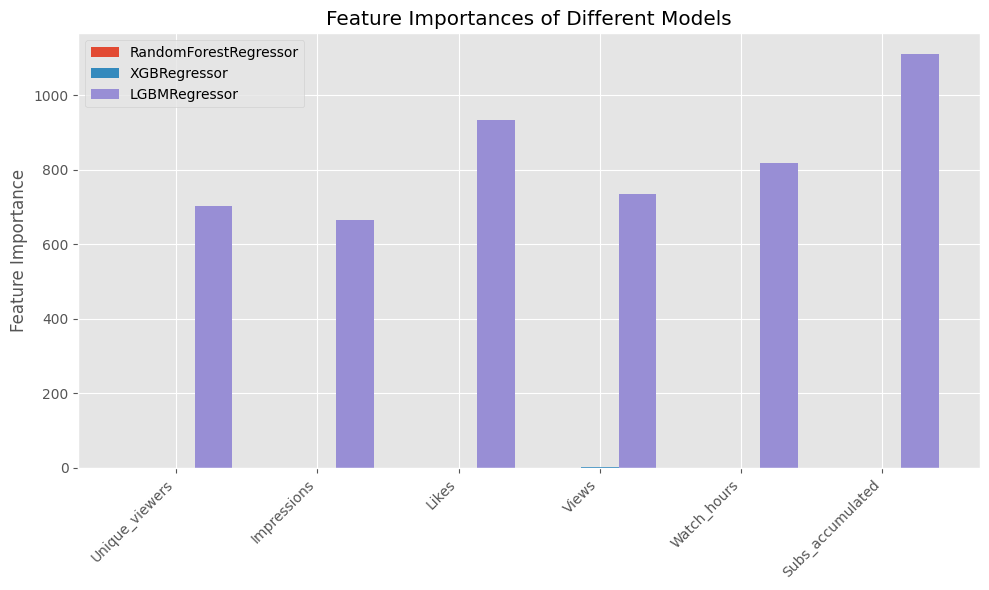

In [ ]:
rf = tt_rfreg.regressor_.named_steps['randomforestregressor']
xgb = tt_xgb.regressor_.named_steps[tt_xgb.regressor_.steps[-1][0]] # Access the estimator within the pipeline
lgbm = tt_lgb.regressor_.named_steps[tt_lgb.regressor_.steps[-1][0]] # Access the estimator within the pipeline

models = [rf, xgb, lgbm]
visualize_ftr_importances(models)

In [ ]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.9 MB/s eta 0:00:00


In [ ]:

!pip install --upgrade pdpbox


In [ ]:
!pip install --upgrade pdpbox


In [ ]:
!pip install pdpbox==0.2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690698 sha256=6fd3d51beff9a9344e07b609168e612103832eee4c9c9c80862581850b348120
  Stored in directory: /root/.cache/pip/wheels/20/35/6a/9905ca9dbdf39e92a9b1197c672aa9561995796e808ebe852c
Successfully built pdpbox
  Attempting uninstall: pdpbox
    Found existing installation: PDPbox 0.3.0
    Uninstalling PDPbox-0.3.0:
      Successfully uninstalled PDPbox-0.3.0


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp
import shap

In [ ]:
def draw_pdp_plot(feature, model, X_val, num_grid_points = 10):
    isolated = pdp_isolate(
        model=model,
        dataset=X_val,
        model_features=X_val.columns,
        feature=feature,
        grid_type='percentile',
        num_grid_points=num_grid_points
    )
    if model.regressor.__class__.__name__ == 'Pipeline':
        print('<<<{} MODEL>>>'.format(model.regressor.named_steps['randomforestregressor'].__class__.__name__))
    else:
        print('<<<{} MODEL>>>'.format(model.regressor.__class__.__name__))
    print('='*100)
    pdp.pdp_plot(isolated, feature)

In [ ]:
features = X_train.columns.tolist()[2:-1]
features


['Likes', 'Views', 'Watch_hours']

In [ ]:
X = pd.concat((X_train, X_test))

In [ ]:
def draw_pdp_plot(feature, model, X_val, num_grid_points=10):
    isolated = pdp_isolate(
        model=model,
        dataset=X_val,
        model_features=X_val.columns,
        feature=feature,
        grid_type='percentile',
        num_grid_points=num_grid_points
    )
    # Check if the regressor is a pipeline
    if model.regressor.__class__.__name__ == 'Pipeline':
        # Get the name of the last step in the pipeline
        last_step_name = model.regressor.steps[-1][0]
        # Get the estimator of the last step
        last_step_estimator = model.regressor.named_steps[last_step_name]
        # Print the class name of the estimator
        print('<<<{} MODEL>>>'.format(last_step_estimator.__class__.__name__))
    else:
        print('<<<{} MODEL>>>'.format(model.regressor.__class__.__name__))
    print('=' * 100)
    pdp.pdp_plot(isolated, feature)

<<<XGBRegressor MODEL>>>


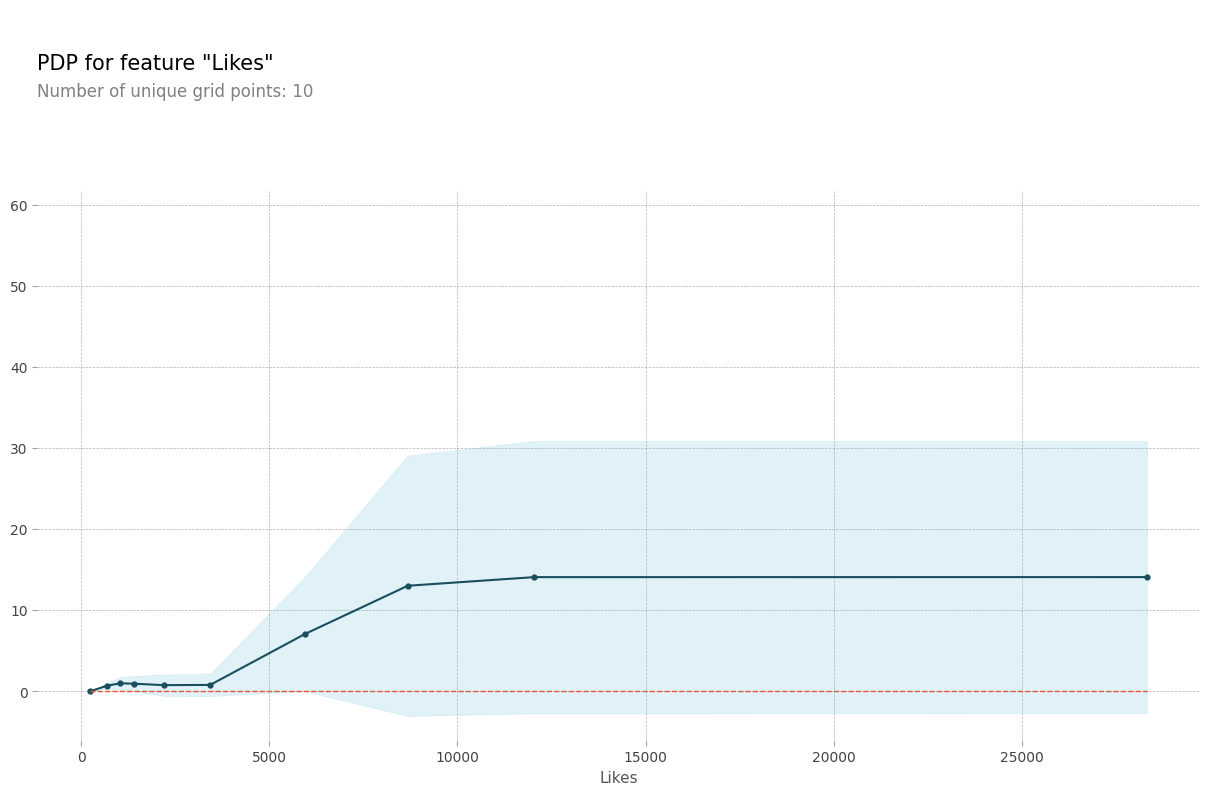

In [ ]:
draw_pdp_plot(features[0], tt_xgb, X)

<<<RandomForestRegressor MODEL>>>


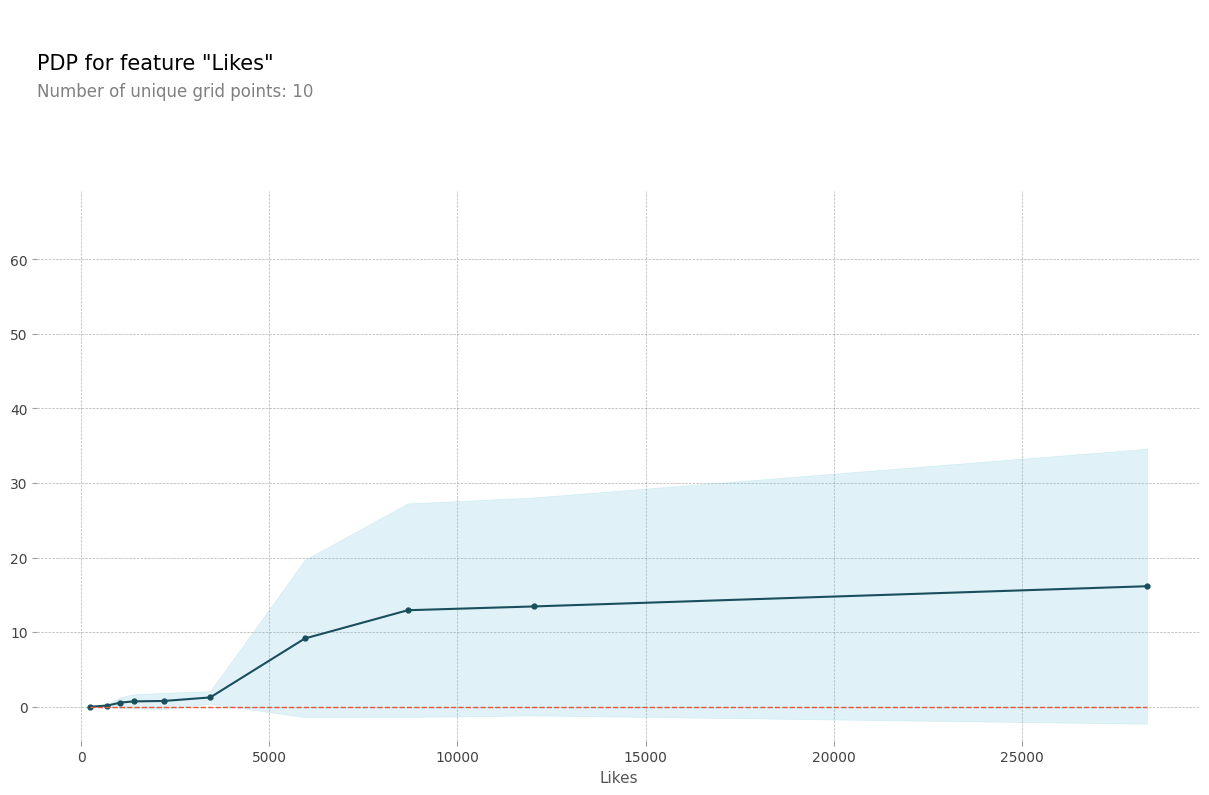

In [ ]:
draw_pdp_plot(features[0], tt_rfreg, X)

<<<LGBMRegressor MODEL>>>


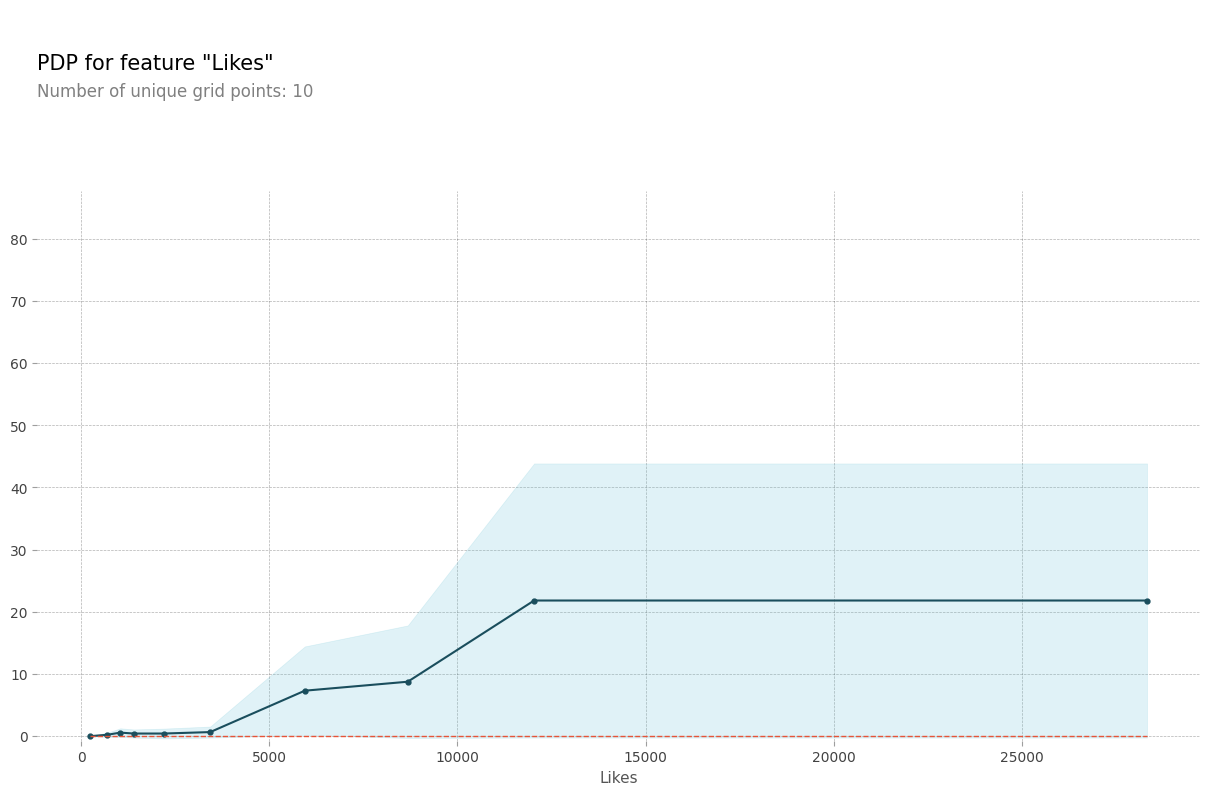

In [ ]:
draw_pdp_plot(features[0], tt_lgb, X)

<<<XGBRegressor MODEL>>>


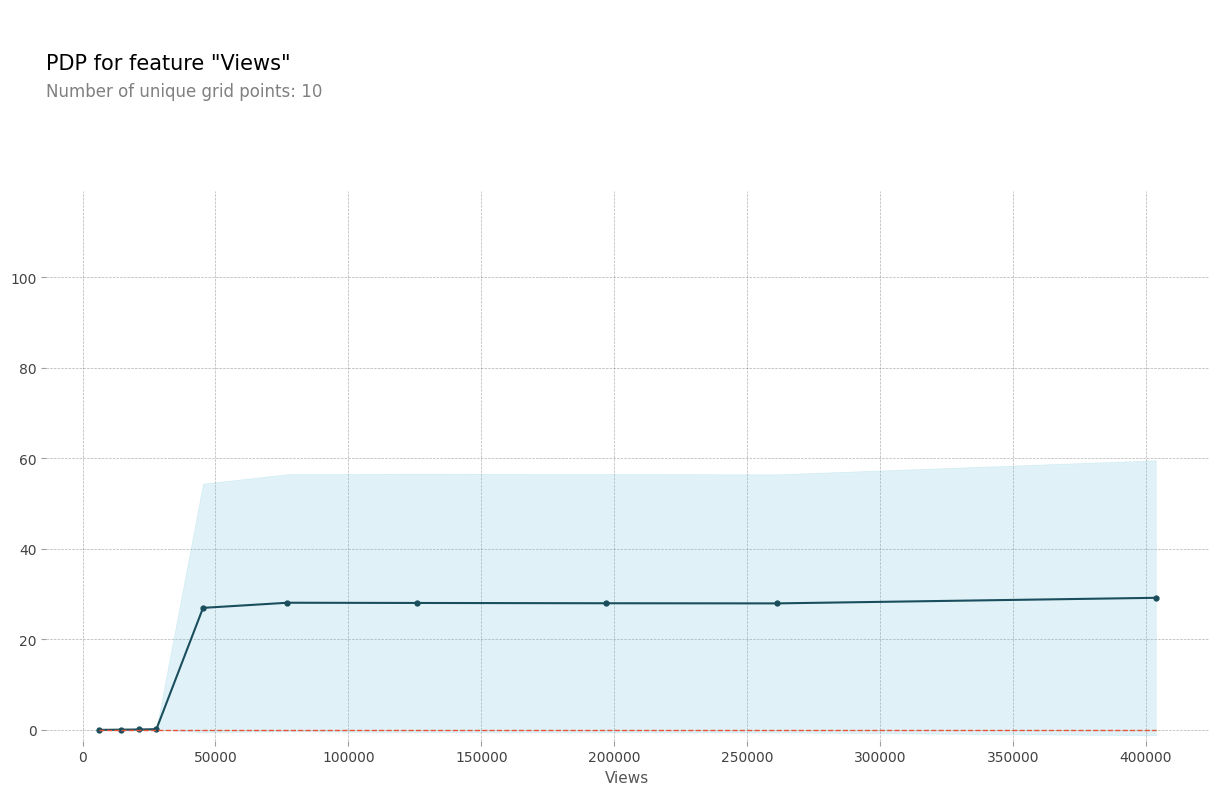

In [ ]:
draw_pdp_plot(features[1], tt_xgb, X)

<<<RandomForestRegressor MODEL>>>


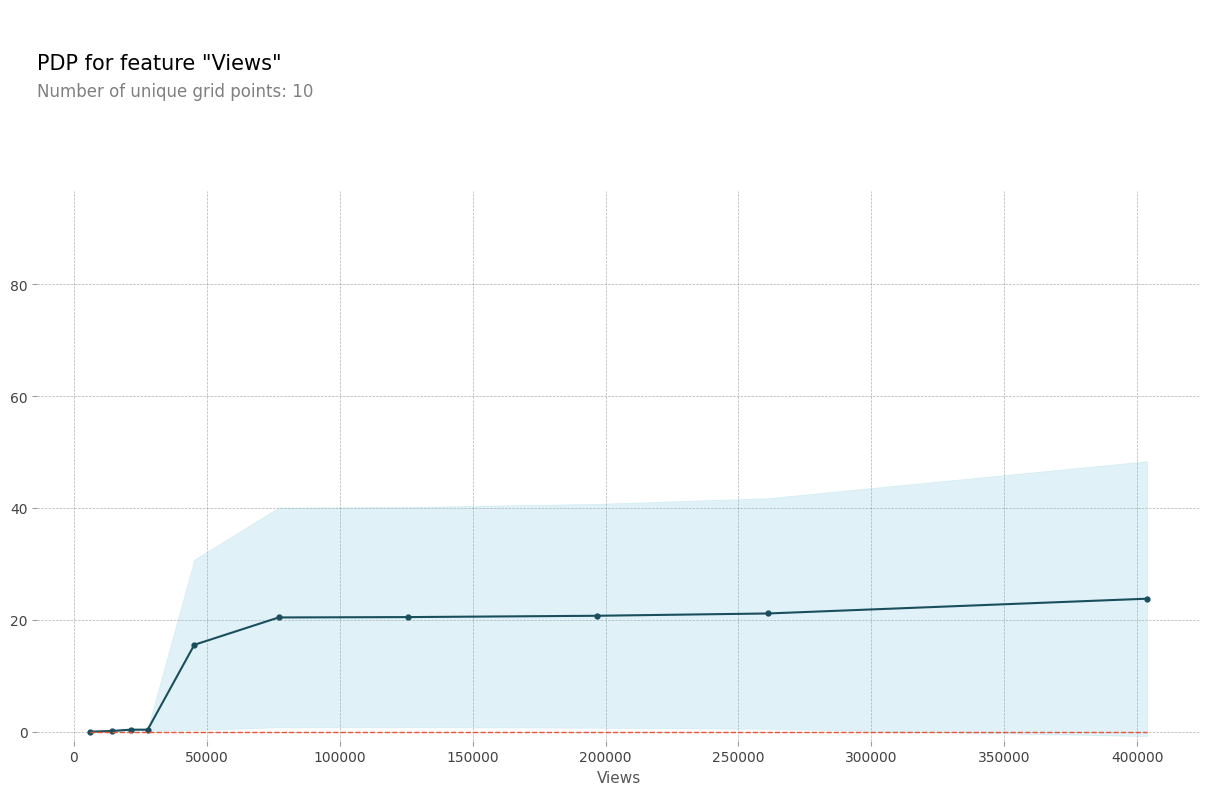

In [ ]:
draw_pdp_plot(features[1], tt_rfreg, X)

<<<LGBMRegressor MODEL>>>


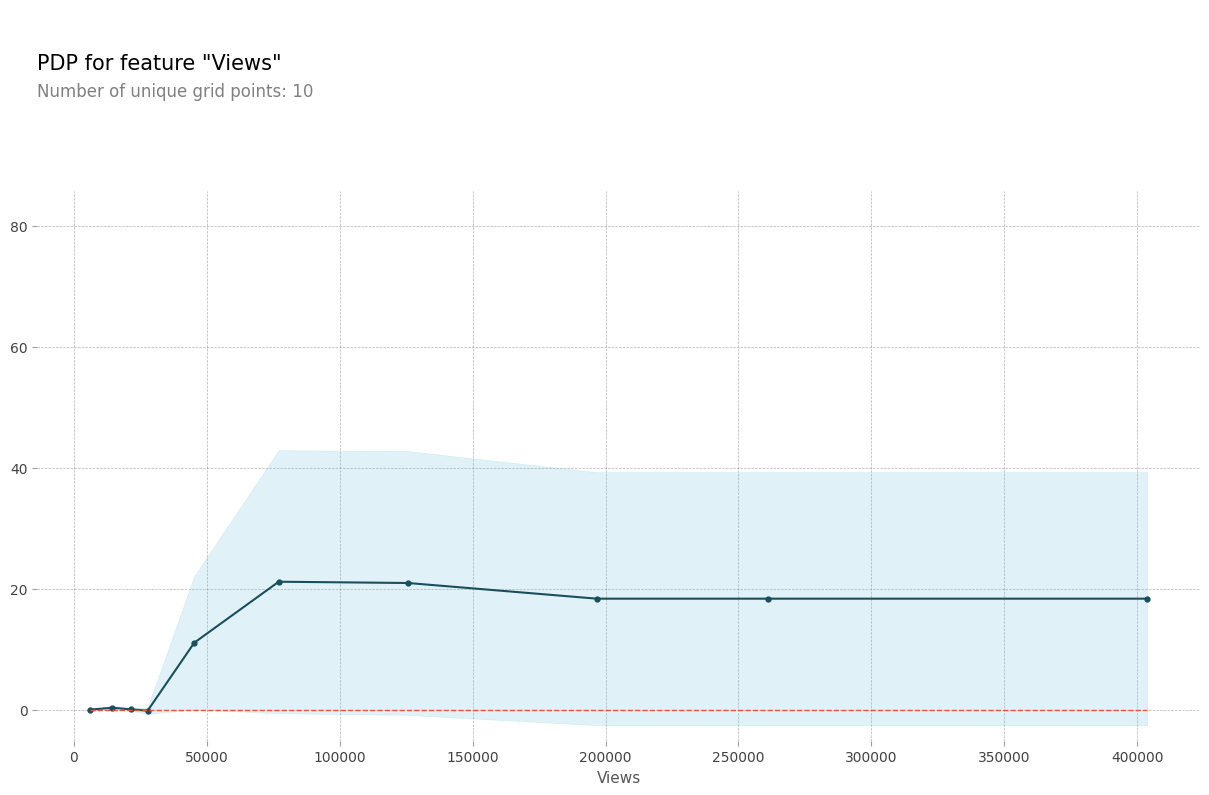

In [ ]:
draw_pdp_plot(features[1], tt_lgb, X)

<<<XGBRegressor MODEL>>>


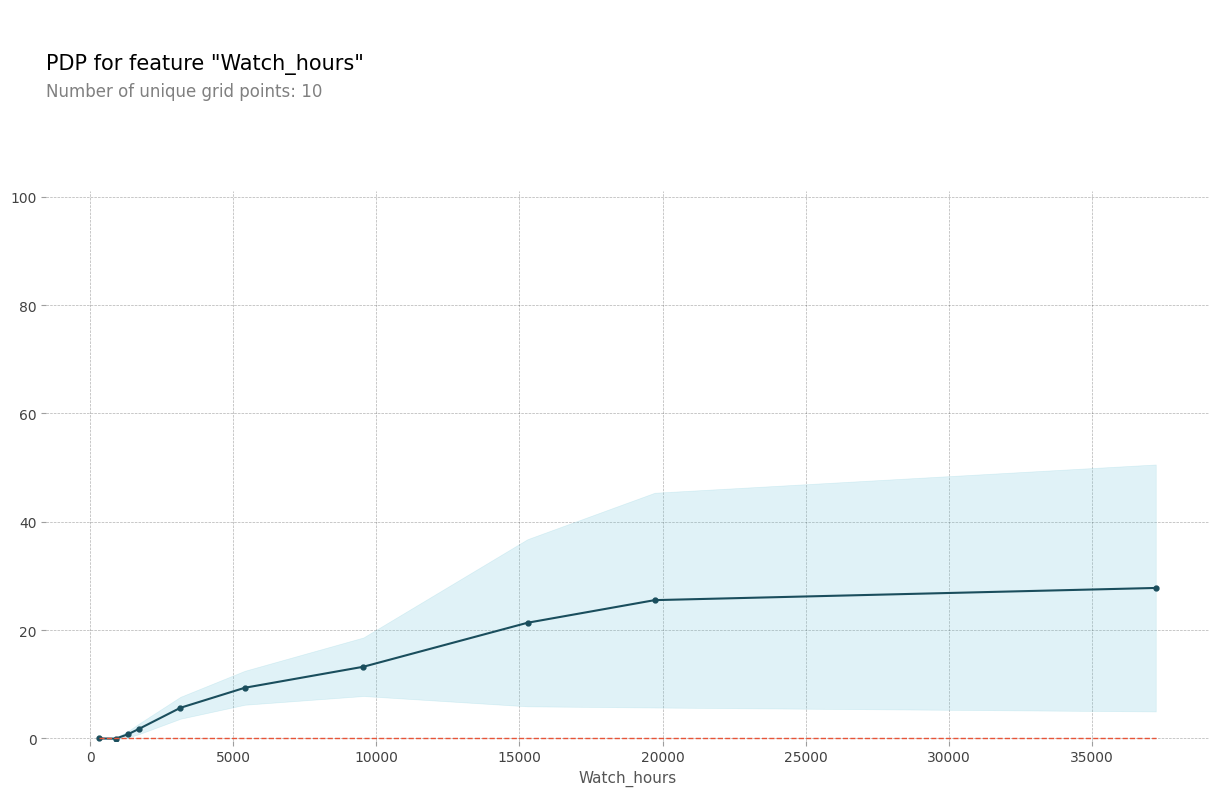

In [ ]:
draw_pdp_plot(features[2], tt_xgb, X)

<<<RandomForestRegressor MODEL>>>


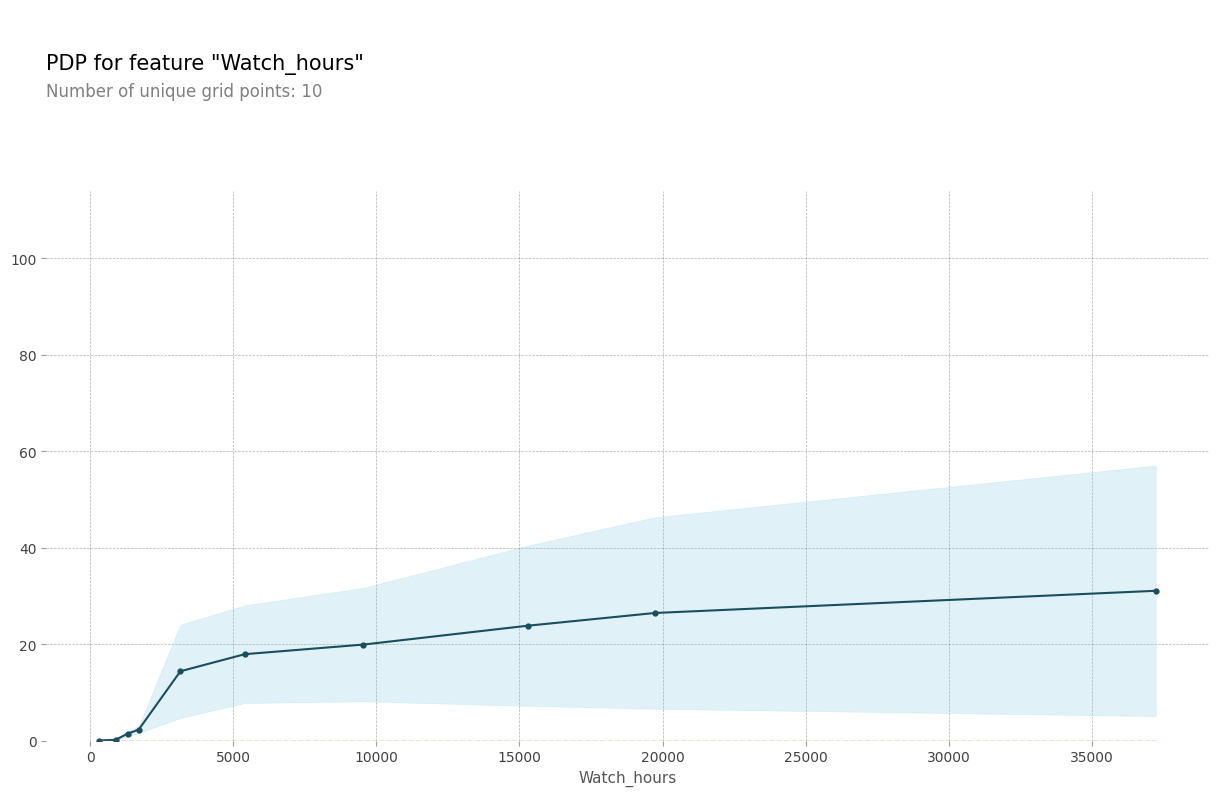

In [ ]:
draw_pdp_plot(features[2], tt_rfreg, X)

<<<LGBMRegressor MODEL>>>


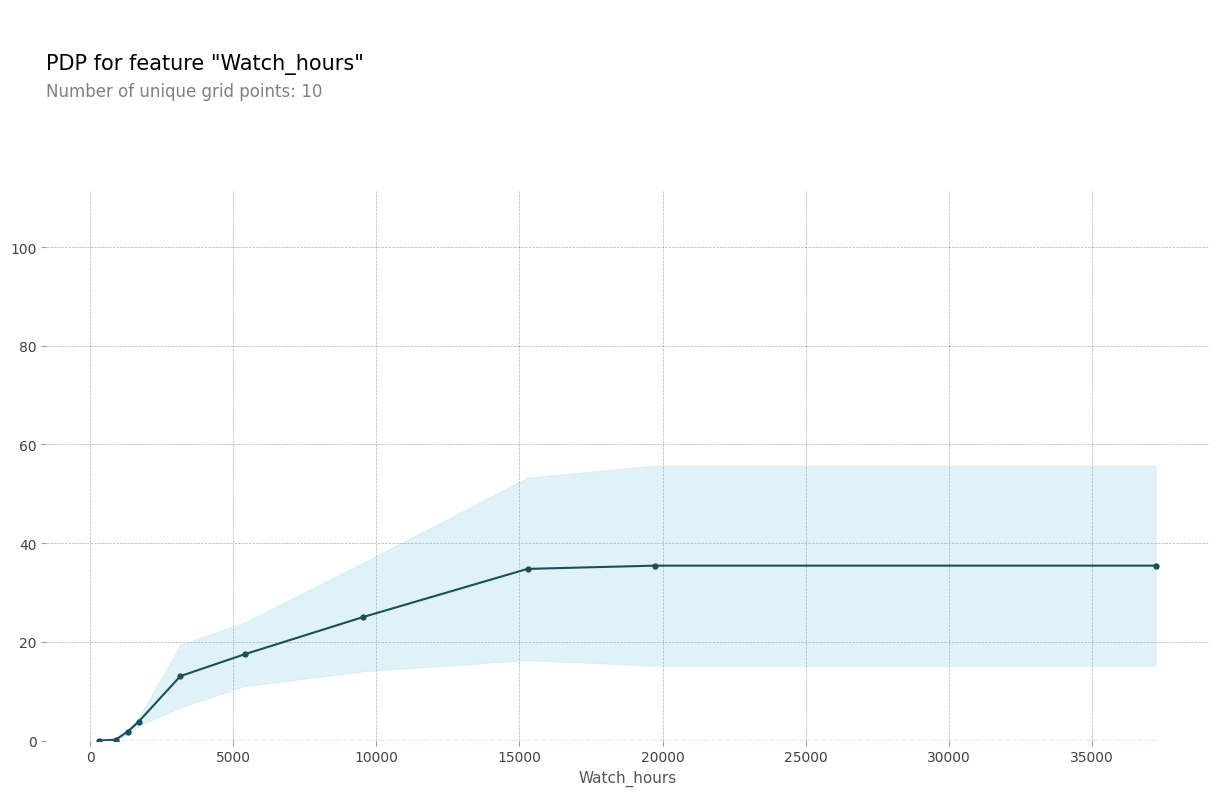

In [ ]:
draw_pdp_plot(features[2], tt_lgb, X)

In [ ]:
def draw_pdp_interaction(model, features, X_test, plot_type):
    interaction = pdp_interact(
        model=model,
        dataset=X_test,
        model_features=X_test.columns,
        features=features
    )
    if model.regressor.__class__.__name__ == 'Pipeline':
        # Get the name of the estimator within the pipeline
        estimator_name = model.regressor.steps[-1][0]
        # Access the estimator using its name
        print('<<<{} MODEL>>>'.format(model.regressor.named_steps[estimator_name].__class__.__name__))
    else:
        print('<<<{} MODEL>>>'.format(model.regressor.__class__.__name__))
    print('='*100)
    pdp_interact_plot(interaction, plot_type=plot_type, feature_names=features)
    plt.show()

<<<XGBRegressor MODEL>>>


TypeError: ContourLabeler.clabel() got an unexpected keyword argument 'contour_label_fontsize'

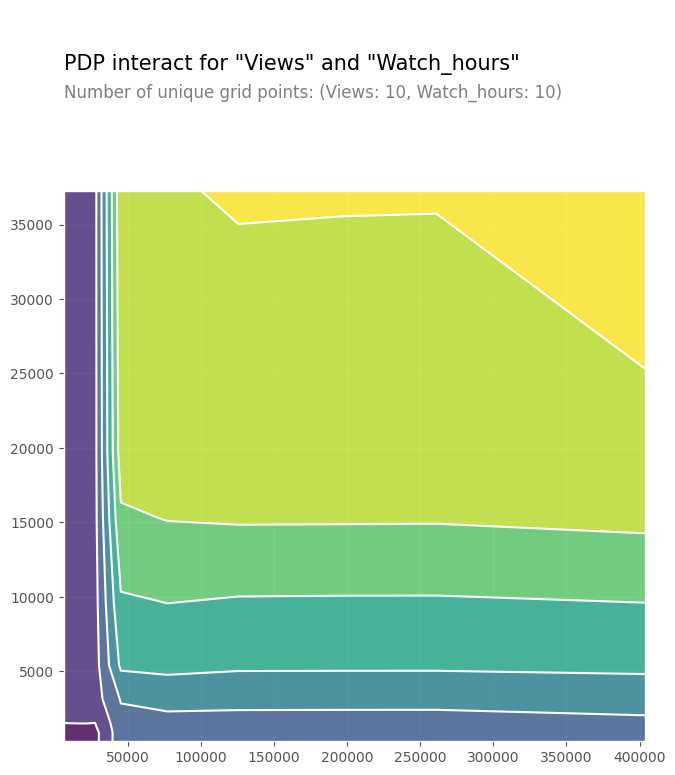

In [ ]:
features = ['Views', 'Watch_hours']
draw_pdp_interaction(tt_xgb, features, X, 'contour')
draw_pdp_interaction(tt_rfreg, features, X, 'contour')
draw_pdp_interaction(tt_lgb, features, X, 'contour')


<<<XGBRegressor MODEL>>>


TypeError: ContourLabeler.clabel() got an unexpected keyword argument 'contour_label_fontsize'

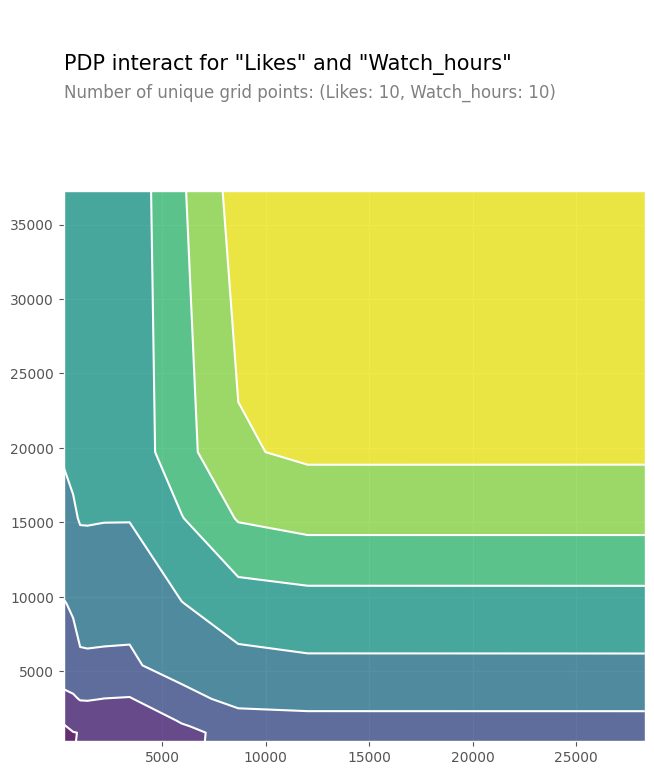

In [ ]:
features = ['Likes', 'Watch_hours']
draw_pdp_interaction(tt_xgb, features, X, 'contour')
draw_pdp_interaction(tt_rfreg, features, X, 'contour')
draw_pdp_interaction(tt_lgb, features, X, 'contour')

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

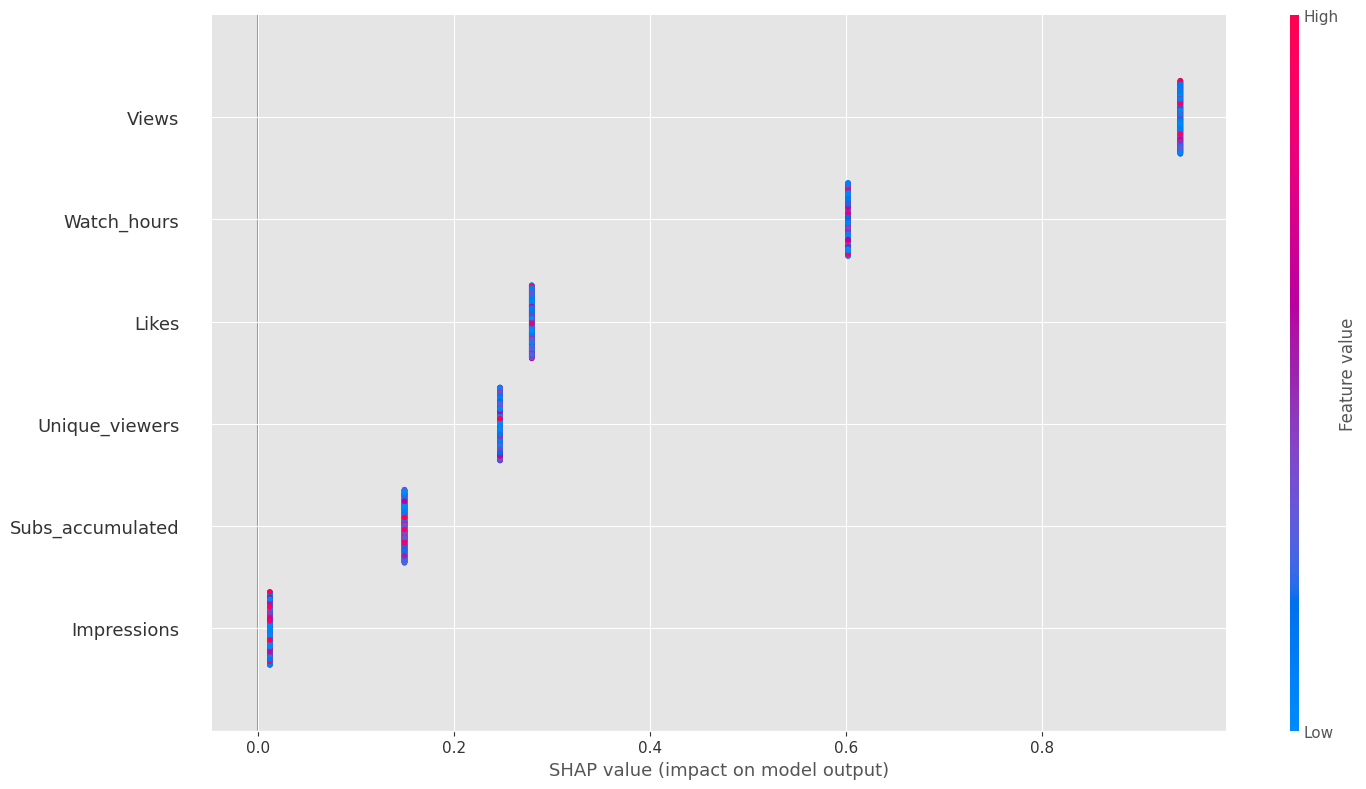

In [ ]:
shap.summary_plot(shap_values, X, plot_size=(15,8))

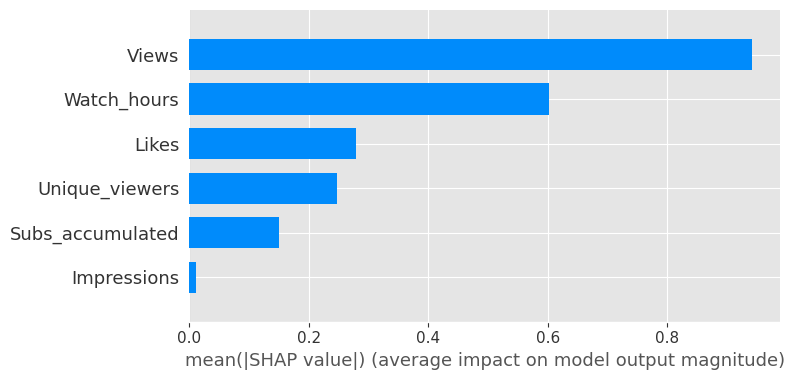

In [ ]:
shap.summary_plot(shap_values, X, plot_type='bar')

In [ ]:
def draw_shap_value(sample):
    explainer = shap.TreeExplainer(xgb)
    shap.initjs()
    samp_df = pd.DataFrame(dict(zip(X_test.columns, np.array(sample).reshape(-1,1))))
    display(shap.force_plot(explainer.expected_value, explainer.shap_values(samp_df.iloc[0]), samp_df.iloc[0]))
    y_pred = np.exp(xgb.predict(samp_df))[0]
    base_value = np.exp(explainer.expected_value)
    samp_df.loc[1] = explainer.shap_values(samp_df.iloc[0])[0].tolist()
    samp_df.index = ['YouTuber\'s Info', 'SHAP values']
    display(samp_df.style.apply(lambda x: ['background: red' if v>0 else 'background: blue' for v in x], axis=0))
    print('Average YouTube Daily Revenue: $ {}'.format(base_value))
    print('Predicted YouTube Daily Revenue: $ {}'.format(y_pred))

In [ ]:
import random

sample = [round(random.uniform(10000,500000)),
          round(random.uniform(100000,10226681)),
          round(random.uniform(1000,40326)),
          round(random.uniform(10000,503655)),
          round(random.uniform(3000,40000), 4),
          round(random.uniform(2000,500000))]
def draw_shap_value(sample):
    explainer = shap.TreeExplainer(xgb)
    shap.initjs()
    # Ensure samp_df has the same columns as the training data
    samp_df = pd.DataFrame([sample], columns=X_train.columns)

    # display(shap.force_plot(explainer.expected_value, explainer.shap_values(samp_df_dmatrix), samp_df))  # Pass samp_df_dmatrix to shap_values
    # Pass samp_df to shap_values and xgb.predict (not samp_df_dmatrix)
    display(shap.force_plot(explainer.expected_value, explainer.shap_values(samp_df), samp_df))
    y_pred = np.exp(xgb.predict(samp_df))[0]
    base_value = np.exp(explainer.expected_value)
    samp_df.loc[1] = explainer.shap_values(samp_df)[0].tolist()  # Pass samp_df to shap_values
    samp_df.index = ['YouTuber\'s Info', 'SHAP values']
    display(samp_df.style.apply(lambda x: ['background: red' if v>0 else 'background: blue' for v in x], axis=0))
    print('Average YouTube Daily Revenue: $ {}'.format(base_value))
    print('Predicted YouTube Daily Revenue: $ {}'.format(y_pred))

In [ ]:
def pred_revenue(unique_viewers, impressions, likes, views, watch_hours, subs_accumulated):
    YouTuber_info = [unique_viewers, impressions, likes, views, watch_hours, subs_accumulated]
    draw_shap_value(YouTuber_info)

In [ ]:
pred_revenue(57626.0, 2586855.0, 4954.0, 141204.0, 10312.5295, 253140.0)
print('Actual Revenue: $ {}'.format(y_test.iloc[0]))

,Unique_viewers,Impressions,Likes,Views,Watch_hours,Subs_accumulated
YouTuber's Info,57626.000000,2586855.000000,4954.000000,141204.000000,10312.529500,253140.000000
SHAP values,0.246885,0.011777,0.279220,0.941704,0.602306,0.149263


Average YouTube Daily Revenue: $ 14.584040641784668
Predicted YouTube Daily Revenue: $ 135.78829956054688
Actual Revenue: $ 55.193
